<a href="https://colab.research.google.com/github/klinhle2306/Seattle-Weather/blob/main/Seattle_St_Louis_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load datasets

The NOAA National Centers for Environmental Information [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) provides the records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

The data are available at this [github repository](https://github.com/klinhle2306/Seattle-Weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [64]:
df_sea = pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/seattle_rain.csv')

In [65]:
type(df_sea)

pandas.core.frame.DataFrame

Load the St. Louis data set

In [66]:
df_stl= pd.read_csv('https://raw.githubusercontent.com/brian-fischer/DATA-3320/main/weather/stl_rain.csv')

In [67]:
type(df_stl)

pandas.core.frame.DataFrame

## Explore the contents of the data sets

**Examine the contents of the Seattle and St. Louis datasets**

In [68]:
df_sea.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [69]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


Check the data types, size of the data frame, and numbers of missing values.

In [70]:
df_sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


In [71]:
df_stl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54574 entries, 0 to 54573
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  54574 non-null  object 
 1   NAME     54574 non-null  object 
 2   DATE     54574 non-null  object 
 3   DAPR     1166 non-null   float64
 4   MDPR     1163 non-null   float64
 5   PRCP     53143 non-null  float64
 6   SNOW     33167 non-null  float64
 7   SNWD     12835 non-null  float64
dtypes: float64(5), object(3)
memory usage: 3.3+ MB


In [72]:
df_sea.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD',
       'WESD', 'WESF'],
      dtype='object')

In [73]:
df_stl.columns

Index(['STATION', 'NAME', 'DATE', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD'], dtype='object')

Even though both datasets have the same datat types, I obeserve that St. Louis dataset contain data from 2017, which is not nessecary to be included. One other observation that I notice is the unique values "STATION" of St. Louis and Seattle. I see that St.Louis records more station whereas Seattle only has data from one station. This difference is the main reason that affect the data size.

In [74]:
df_stl['STATION'].unique()

array(['US1MOSS0027', 'US1MOSL0019', 'US1MOSL0018', 'US1MOSL0039',
       'US1MOSLC010', 'US1ILSC0009', 'US1MOSL0050', 'US1MOJF0018',
       'US1MOSL0070', 'US1MOSL0092', 'US1MOSL0079', 'US1MOSL0056',
       'US1MOSL0055', 'US1MOSL0077', 'US1ILMD0047', 'US1MOSL0054',
       'US1MOSL0076', 'US1MOSL0074', 'US1MOSLC007', 'US1MOFSA189',
       'US1MOSL0027', 'US1MOSL0049', 'US1MOSL0004', 'USC00237397',
       'USC00237452', 'USC00237398', 'US1ILSC0018', 'US1MOSS0034',
       'USW00003960', 'US1MOSL0083', 'US1ILMO0006', 'US1MOSL0081',
       'US1MOJF0025', 'US1MOSS0051', 'US1ILMD0010', 'US1MOSL0024',
       'US1MOSL0045', 'US1MOSL0067', 'US1MOSL0020', 'US1ILMD0012',
       'US1MOSL0063', 'USW00013994', 'US1MOSL0062', 'US1MOSL0084'],
      dtype=object)

In [75]:
df_stl['STATION'].value_counts()

USW00003960    2191
USW00013994    2191
USC00237397    2189
USC00237398    2189
US1MOSLC007    2179
USC00237452    2154
US1ILMD0010    2150
US1MOSL0024    2122
US1MOJF0018    2113
US1MOSL0027    2085
US1ILMD0012    1954
US1MOSL0049    1938
US1MOSL0018    1923
US1MOSL0004    1868
US1MOSL0050    1810
US1MOSL0055    1792
US1MOFSA189    1776
US1MOSL0074    1674
US1MOSS0027    1663
US1MOSL0020    1544
US1MOSL0067    1473
US1ILSC0009    1399
US1MOSL0039    1354
US1MOSL0077    1339
US1MOJF0025    1124
US1MOSL0070     965
US1MOSL0063     924
US1MOSL0081     914
US1MOSL0045     849
US1MOSL0062     807
US1MOSL0083     646
US1ILSC0018     453
US1MOSL0084     401
US1MOSL0079     371
US1MOSS0051     302
US1MOSLC010     291
US1MOSL0054     248
US1MOSL0092     232
US1ILMD0047     218
US1MOSL0076     211
US1MOSL0056     198
US1ILMO0006     162
US1MOSS0034     130
US1MOSL0019      58
Name: STATION, dtype: int64

In [76]:
df_sea['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

## Convert data types

Convert `DATE` to Datetime for both datasets

In [77]:
df_sea['DATE'] = pd.to_datetime(df_sea['DATE'])

In [78]:
df_sea.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-02,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-03,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-04,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",2018-01-05,NaN,NaN,0.25,NaN,NaN,NaN,NaN


In [79]:
df_stl['DATE'] = pd.to_datetime(df_stl['DATE'])

In [80]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


## Select relevant subsets of the data

**Remove unnecessary parts of the data sets**

Because I learned that St. Louis contain data from 2017, I limit that dataset to 2018 and later. 

In [81]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0


In [82]:
df_stl = df_stl.loc[df_stl['DATE'] >= '2018-01-01']

In [83]:
df_stl.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
241,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-05,NaN,NaN,0.00,0.2,1.0
242,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-08,NaN,NaN,0.24,NaN,NaN
243,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-10,NaN,NaN,0.00,NaN,NaN
244,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-11,NaN,NaN,0.02,NaN,NaN
245,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2018-01-15,NaN,NaN,0.05,0.5,NaN


The St. Louis dataset has values for many weather stations, while the Seattle data set has only one weather station. Therefore I will focus on the data from the airport in St. Louis.

In [84]:
df_stl = df_stl.loc[df_stl['NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT, MO US']

In [85]:
df_stl['STATION'].value_counts()

USW00013994    1826
Name: STATION, dtype: int64

In [86]:
df_sea['STATION'].value_counts()

US1WAKG0225    1658
Name: STATION, dtype: int64

Now I have Seattle and St. Louis datasets with similar number of data. From here I can start to indentify missing values.

## Identify and deal with missing values

**Count the non-null or null values**

In [87]:
df_stl.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1826
MDPR       1826
PRCP          0
SNOW          0
SNWD          0
dtype: int64

I see that the St. Louis data set does not have any missng values of `DATE` or `PRCP`. In addition there are no missing dates in the datasets because in total we have 1826 days in five years.

In [88]:
df_sea.isna().sum()

STATION       0
NAME          0
DATE          0
DAPR       1635
MDPR       1635
PRCP         22
SNOW       1305
SNWD       1592
WESD       1643
WESF       1630
dtype: int64

I see that the Seattle dataset has some missing dates and precipitation values. To indentify and visualize the missing values,I use `missingno` to graph a time series plot. This plot is helpful to determine where the missing values are located but it doesn't indicate where there are dates that are not present in the dataset.

To fix this problem, I will join the two datasets together. From this, it will show the missing datas from Seattle dataset.

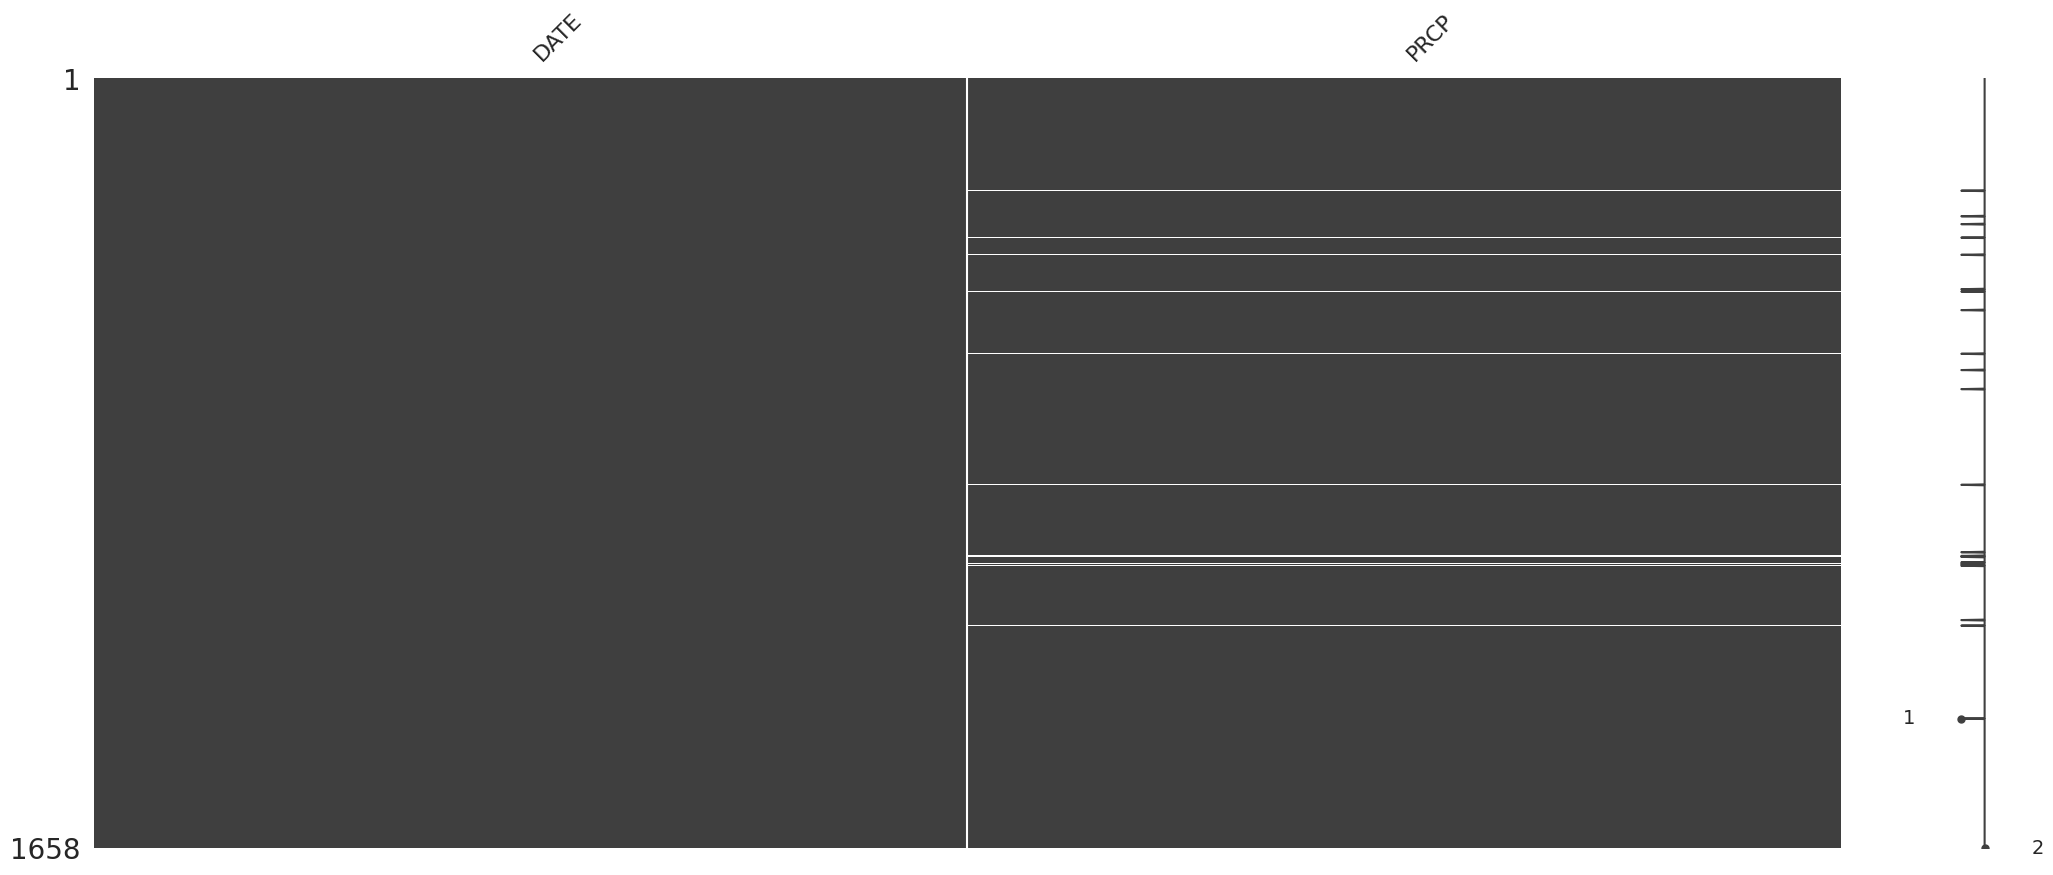

In [89]:
msno.matrix(df_sea[['DATE','PRCP']]);

## Join data frames keeping `DATE` and `PRCP` columns

**Perform left join on St. Louis dataset**

Because the St. Louis dataste has all the `DATE` data, doing a left join with the stl dataset would tell us the missing dates in the Seattle dataset.

In [90]:
df = df_stl[['DATE', 'PRCP']].merge(df_sea[['DATE', 'PRCP']], on='DATE', how='left')

In [91]:
df.head()

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.0,0.00
1,2018-01-02,0.0,0.00
2,2018-01-03,0.0,0.00
3,2018-01-04,0.0,0.00
4,2018-01-05,0.0,0.25


## Create a tidy data frame with columns for city and precipitation

In [92]:
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.31,0.62


In [93]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

Using `pd.melt` to reformat the dataset. This method doesn't change any values of the datasets, rather it put dataset in a more readable format. 

I will change the attributes name to make the data more readable and easier to identify informations and missing values. 

In [94]:
df.head()

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.0
1,2018-01-02,PRCP_x,0.0
2,2018-01-03,PRCP_x,0.0
3,2018-01-04,PRCP_x,0.0
4,2018-01-05,PRCP_x,0.0


As observed, the values in `CITY` refers to St. Louis or Seattle; however it would be hard to know that first-hand. Therefore I will change `PRCP_x` and `PRCP_y` to its corresponding cities.

### Rename the columns, if necessary, to follow best practices of being lowercase, snake_case, and understandable.

**Rename `PRCP_x` and `PRCP_y` to its corresponding cities**

In [95]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'STL'

In [96]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [97]:
df

,DATE,CITY,PRCP
0,2018-01-01,STL,0.00
1,2018-01-02,STL,0.00
2,2018-01-03,STL,0.00
3,2018-01-04,STL,0.00
4,2018-01-05,STL,0.00
...,...,...,...
3647,2022-12-27,SEA,0.78
3648,2022-12-28,SEA,0.40
3649,2022-12-29,SEA,0.03
3650,2022-12-30,SEA,0.62


**Rename the attibutes to be lowercase for better readability**

In [98]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})

In [99]:
df.head()

,date,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


## Deal with missing values

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3462 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


<Axes: >

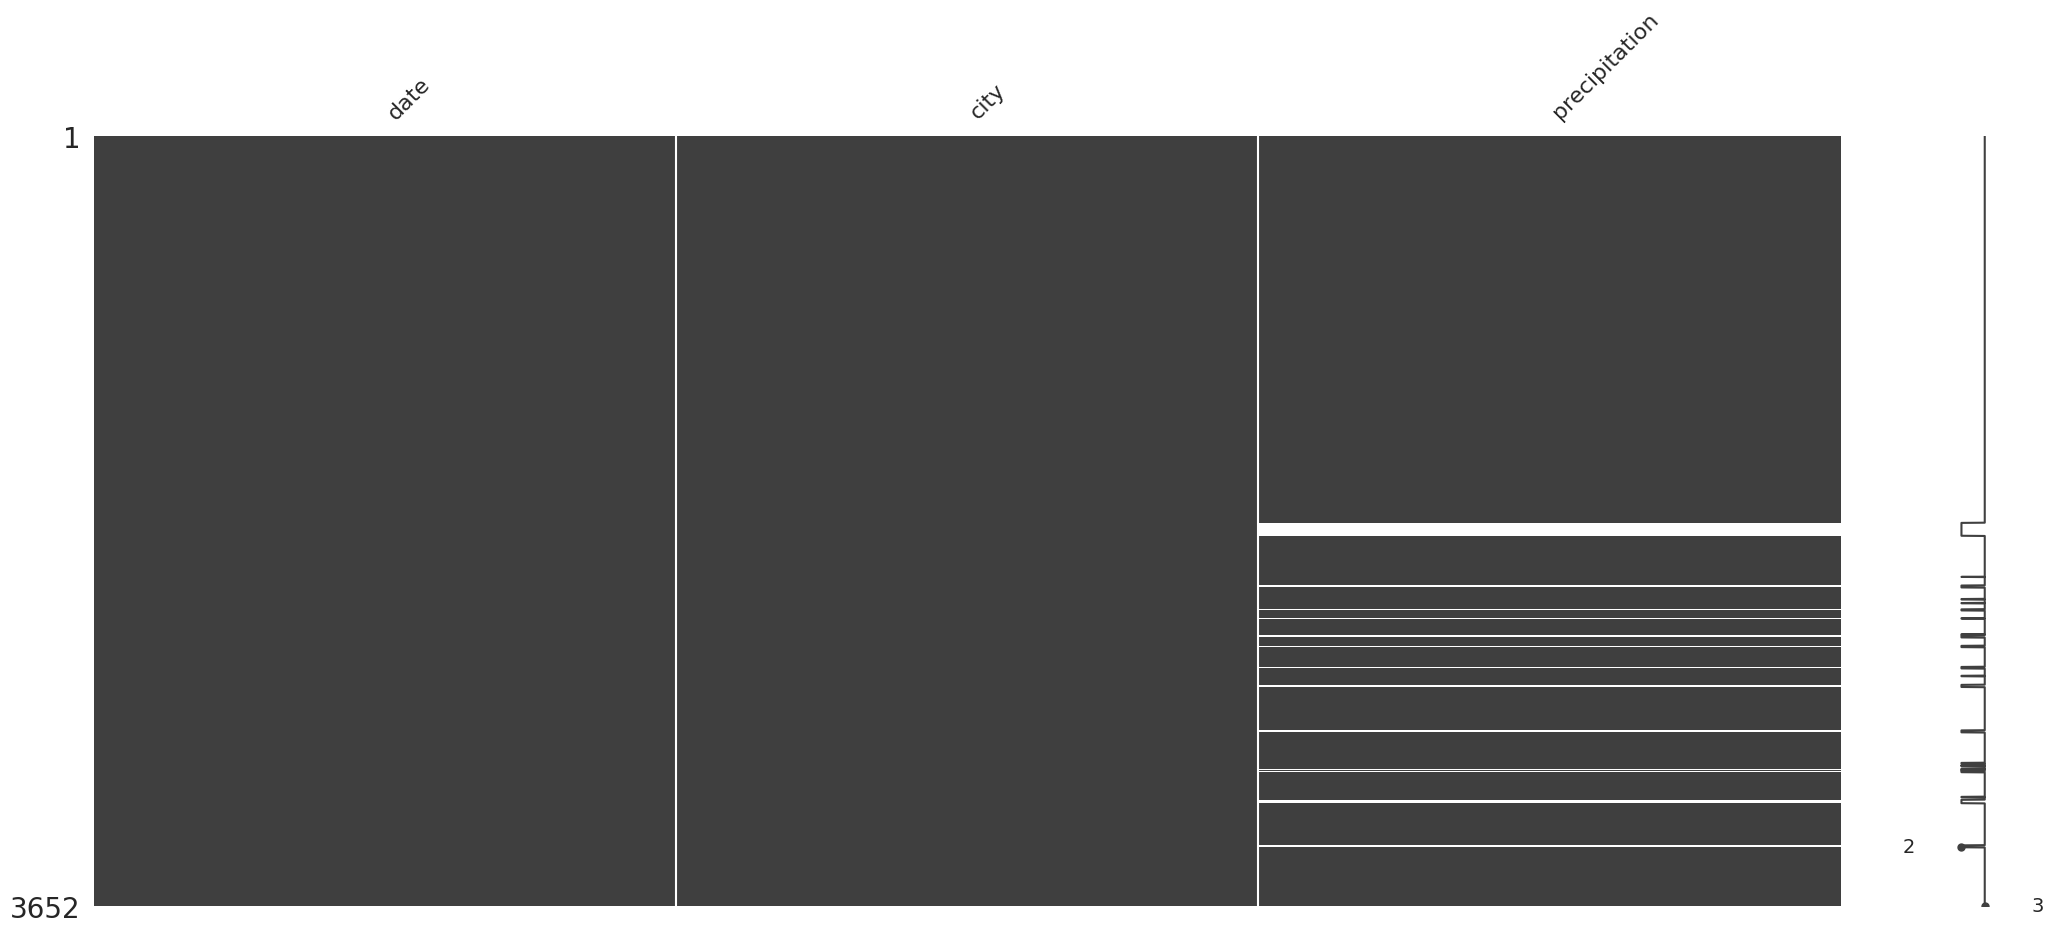

In [101]:
msno.matrix(df)

Now that I have joined both datasets and put them in a tidy format, it is easier to identify missing values. I see that the missing values start at the beginning of the second half of the precipitation. This means that Seattle has missing values at the top of the datset.

### Impute missing values

This algorithm is to imput missing values in the dataset using the mean across years on the day with missing precipitation value.

1. Add a column with that label each day of the year with indices start at day 1 and goes all the way to day 365.

In [102]:
df.head()

,date,city,precipitation
0,2018-01-01,STL,0.0
1,2018-01-02,STL,0.0
2,2018-01-03,STL,0.0
3,2018-01-04,STL,0.0
4,2018-01-05,STL,0.0


In [103]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year

In [104]:
df.head(30)

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
5,2018-01-06,STL,0.00,6
6,2018-01-07,STL,0.35,7
7,2018-01-08,STL,0.00,8
8,2018-01-09,STL,0.00,9
9,2018-01-10,STL,0.00,10


2. To identify where the missing values are, I get the index of the row where the precipitation is missing and store it in the `indices` array.

In [105]:
df[df['precipitation'].isna()]

,date,city,precipitation,day_of_year
1834,2018-01-09,SEA,NaN,9
1835,2018-01-10,SEA,NaN,10
1836,2018-01-11,SEA,NaN,11
1837,2018-01-12,SEA,NaN,12
1838,2018-01-13,SEA,NaN,13
...,...,...,...,...
3368,2022-03-23,SEA,NaN,82
3369,2022-03-24,SEA,NaN,83
3370,2022-03-25,SEA,NaN,84
3371,2022-03-26,SEA,NaN,85


In [106]:
indices = np.where(df['precipitation'].isna()==True)[0]

In [107]:
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

3. Compute the mean precipitation of each day in the Seattle dataset.

In [108]:
df['day_of_year'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [109]:
pd.DatetimeIndex(df.loc[df['date'] == '2019-03-01', 'date']).day_of_year

Int64Index([60, 60], dtype='int64', name='date')

In [110]:
pd.DatetimeIndex(df.loc[df['date'] == '2020-03-01', 'date']).day_of_year

Int64Index([61, 61], dtype='int64', name='date')

4. Take average of the precipitation of each day.

In [111]:
mean_day_precipitation = df.loc[df['city']=='SEA', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()

In [112]:
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


5. Use `enumerate` to replace each missing value witht he mean daily precipritation.

Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object.

In [113]:
for _, index in enumerate(indices):
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index,'day_of_year']].values[0]

6. Check that there are no missing values.

In [114]:
df[df['precipitation'].isna()==True]

,date,city,precipitation,day_of_year


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3652 non-null   float64       
 3   day_of_year    3652 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 114.2+ KB


In [116]:
df

,date,city,precipitation,day_of_year
0,2018-01-01,STL,0.00,1
1,2018-01-02,STL,0.00,2
2,2018-01-03,STL,0.00,3
3,2018-01-04,STL,0.00,4
4,2018-01-05,STL,0.00,5
...,...,...,...,...
3647,2022-12-27,SEA,0.78,361
3648,2022-12-28,SEA,0.40,362
3649,2022-12-29,SEA,0.03,363
3650,2022-12-30,SEA,0.62,364


## Create relevant derived variables as new columns

In [117]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [118]:
df

,date,city,precipitation,day_of_year,month
0,2018-01-01,STL,0.00,1,1
1,2018-01-02,STL,0.00,2,1
2,2018-01-03,STL,0.00,3,1
3,2018-01-04,STL,0.00,4,1
4,2018-01-05,STL,0.00,5,1
...,...,...,...,...,...
3647,2022-12-27,SEA,0.78,361,12
3648,2022-12-28,SEA,0.40,362,12
3649,2022-12-29,SEA,0.03,363,12
3650,2022-12-30,SEA,0.62,364,12


I add a month variable to the dataset because this information will help me to perform a more detailed analysis later. 

## Export the clean .csv file

In [119]:
from google.colab import files

df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 
files.download('clean_seattle_stl_weather.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>